In [1]:
import numpy as np
from sklearn import *
import tensorflow as tf
import tensorflow.keras
import matplotlib.pyplot as plt

<font size="5">import data</font>

In [2]:
data = np.genfromtxt("data/train.csv", delimiter=",", skip_header=1)
# np.random.shuffle(data)
print(data.shape)

(42000, 785)


In [73]:
Xtest_data = np.genfromtxt("data/test.csv", delimiter=",", skip_header=1)

In [74]:
Xtest = Xtest_data
print(Xtest.shape)

(28000, 784)


In [75]:
X = data[:,1:]
Y = data[:,0]

print(X.shape)
print(Y.shape)


(42000, 784)
(42000,)


<font size="5">data visualization</font>

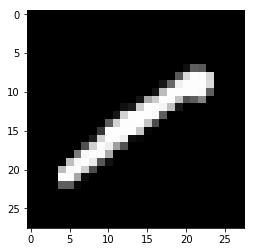

In [76]:
plt.figure()
img = np.reshape(X[0,:],(28,28))
plt.imshow(img.T, cmap="gray")

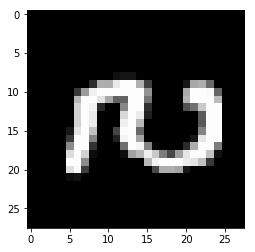

In [83]:
plt.figure()
img = np.reshape(Xtest_data[10,:],(28,28))
plt.imshow(img.T, cmap="gray")

In [78]:
#normalize
X = X/255
Xtest = Xtest/255
print(X.shape)
print(Xtest.shape)

(42000, 784)
(28000, 784)


<font size="5">feature selection</font>

In [79]:
edge_cutoff=3
x_reshape=[]
for i in range(len(X)):
    x_reshape.append(X[i].reshape((28, 28))[edge_cutoff:28-edge_cutoff, edge_cutoff:28-edge_cutoff].flatten())
X = np.array(x_reshape)
print(X.shape)

img_dim = 28 - (2 * edge_cutoff)

(42000, 484)


In [80]:
x_reshape=[]
for i in range(len(Xtest)):
    x_reshape.append(Xtest[i].reshape((28, 28))[edge_cutoff:28-edge_cutoff, edge_cutoff:28-edge_cutoff].flatten())
Xtest = np.array(x_reshape)
print(Xtest.shape)

(28000, 484)


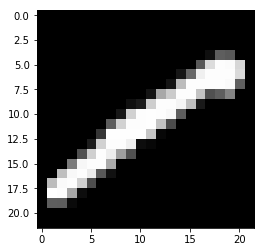

In [81]:
#visualization to make sure the feature selection is working as intended
plt.figure()
img = np.reshape(X[0,:],(img_dim,img_dim))
plt.imshow(img.T, cmap="gray")

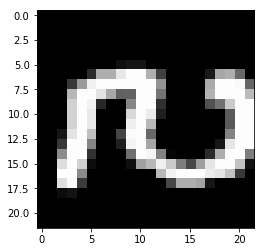

In [84]:
#visualization to make sure the feature selection is working as intended
plt.figure()
img = np.reshape(Xtest[10,:],(img_dim,img_dim))
plt.imshow(img.T, cmap="gray")

<font size="5">training/validation split</font>

In [33]:
#train_test_split shuffles the data
Xtr, Xva, Ytr, Yva = model_selection.train_test_split(X, Y, train_size=.75, random_state=0)

print(Xtr.shape)
print(Ytr.shape)

(31500, 484)
(31500,)


C:\Users\caojo\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


<font size="5">Model Setup</font>

In [133]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Reshape((img_dim, img_dim, 1), input_shape=(len(Xtr[0]),)))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(6,6), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation=tf.nn.relu))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.layers.Flatten())
model.add(tf.keras.layers.Dense(units=500, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

<font size="5">Train the Model</font>

In [138]:
model.fit(Xtr, Ytr, epochs=80, batch_size=3000, validation_data=(Xva, Yva))

Train on 31500 samples, validate on 10500 samples
Epoch 1/20
31500/31500 [==============================] - 15s 482us/step - loss: 0.0241 - acc: 0.9918 - val_loss: 0.0290 - val_acc: 0.9909
Epoch 2/20
31500/31500 [==============================] - 15s 486us/step - loss: 0.0234 - acc: 0.9925 - val_loss: 0.0285 - val_acc: 0.9904
Epoch 3/20
31500/31500 [==============================] - 15s 490us/step - loss: 0.0236 - acc: 0.9918 - val_loss: 0.0290 - val_acc: 0.9910
Epoch 4/20
31500/31500 [==============================] - 15s 488us/step - loss: 0.0226 - acc: 0.9925 - val_loss: 0.0293 - val_acc: 0.9909
Epoch 5/20
31500/31500 [==============================] - 15s 491us/step - loss: 0.0226 - acc: 0.9925 - val_loss: 0.0288 - val_acc: 0.9910
Epoch 6/20
31500/31500 [==============================] - 15s 490us/step - loss: 0.0232 - acc: 0.9924 - val_loss: 0.0285 - val_acc: 0.9908
Epoch 7/20
31500/31500 [==============================] - 15s 489us/step - loss: 0.0224 - acc: 0.9928 - val_loss: 0.

<font size="5">Evaluate Model</font>

In [139]:
p = model.predict(Xva)
p = np.argmax(p, axis=1)

print(metrics.accuracy_score(Yva, p))

0.9908571428571429


<font size="5">Write Test Predictions</font>

In [140]:
test_pred = model.predict(Xtest)
test_pred = np.argmax(test_pred, axis=1)

f = open("output/kaggle_keras_4.csv", "w")
f.write("ImageId,Label\n")
for i in range(len(test_pred)):
    f.write(str(i+1) + "," + str(test_pred[i]) + "\n")
f.close()